### Question 1
Explain the differences between AI, ML, Deep Learning (DL), and Data Science (DS).


**Answer:**  
- **Artificial Intelligence (AI):** Broad field of computer science that focuses on creating systems that mimic human intelligence, including reasoning, problem solving, and decision making.  
- **Machine Learning (ML):** A subset of AI where systems learn patterns from data without explicit programming.  
- **Deep Learning (DL):** A specialized branch of ML that uses multi-layered neural networks to model complex patterns. Example: image recognition.  
- **Data Science (DS):** A multidisciplinary field that combines statistics, data analysis, ML, and domain expertise to extract insights from data for decision-making.  


### Question 2
What are the types of machine learning? Describe each with one real-world example.


**Answer:**  
1. **Supervised Learning:** Model learns from labeled data (input-output pairs). Example: Spam email classification.  
2. **Unsupervised Learning:** Model works with unlabeled data to find patterns. Example: Customer segmentation using clustering.  
3. **Reinforcement Learning:** Agent learns through trial and error by interacting with the environment and receiving rewards. Example: Game-playing AI (like AlphaGo).  


### Question 3
Define overfitting, underfitting, and the bias-variance tradeoff in machine learning.


**Answer:**  
- **Overfitting:** Model learns both patterns and noise in training data, performing well on training but poorly on new data.  
- **Underfitting:** Model is too simple and fails to capture patterns, leading to poor performance on both training and test data.  
- **Bias-Variance Tradeoff:** Balance between bias (error from overly simple models) and variance (error from overly complex models). Optimal performance comes from managing this tradeoff.  


### Question 4
What are outliers in a dataset, and list three common techniques for handling them.


**Answer:**  
- **Outliers:** Data points that significantly differ from other observations.  
**Techniques to handle outliers:**  
1. Removal of outliers.  
2. Transformation (e.g., log scaling).  
3. Winsorization (replacing extreme values with percentile values).  


### Question 5
Explain the process of handling missing values and mention one imputation technique for numerical and one for categorical data.


**Answer:**  
- **Process of handling missing values:** Detect missingness, analyze patterns, decide to drop or impute values.  
- **Numerical Imputation:** Replace missing values with mean or median.  
- **Categorical Imputation:** Replace missing values with the mode or 'Unknown' category.  


### Question 6
Write a Python program that:

● Creates a synthetic imbalanced dataset with make_classification() from sklearn.datasets.

● Prints the class distribution.
(Include your Python code and output in the code box below.)

In [6]:
from sklearn.datasets import make_classification
from collections import Counter
import numpy as np

# Create synthetic imbalanced dataset
X, y = make_classification(
    n_samples=1000,         # total samples
    n_features=20,          # total features
    n_informative=2,        # number of informative features
    n_redundant=10,         # number of redundant features
    n_clusters_per_class=1, # clusters per class
    weights=[0.9, 0.1],     # imbalance: 90% class 0, 10% class 1
    flip_y=0,               # no noise
    random_state=42         # for reproducibility
)

# Print class distribution
class_distribution = Counter(y)
print("Class distribution:")
for label, count in class_distribution.items():
    print(f"Class {label}: {count} samples")


Class distribution:
Class 0: 900 samples
Class 1: 100 samples


### Question 7
Implement one-hot encoding using pandas for the following list of colors: ['Red', 'Green', 'Blue', 'Green', 'Red']. Print the resulting dataframe.
(Include your Python code and output in the code box below.)

In [10]:

import pandas as pd

# Original list of colors
colors = ['Red', 'Green', 'Blue', 'Green', 'Red']

# Convert to a DataFrame
df = pd.DataFrame({'Color': colors})

# Apply one-hot encoding
one_hot_encoded = pd.get_dummies(df['Color']).astype(int)

# Print the resulting DataFrame
print(one_hot_encoded)


   Blue  Green  Red
0     0      0    1
1     0      1    0
2     1      0    0
3     0      1    0
4     0      0    1


### Question 8
Write a Python script to:

● Generate 1000 samples from a normal distribution.
● Introduce 50 random missing values.
● Fill missing values with the column mean.
● Plot a histogram before and after imputation.

(Include your Python code and output in the code box below.)

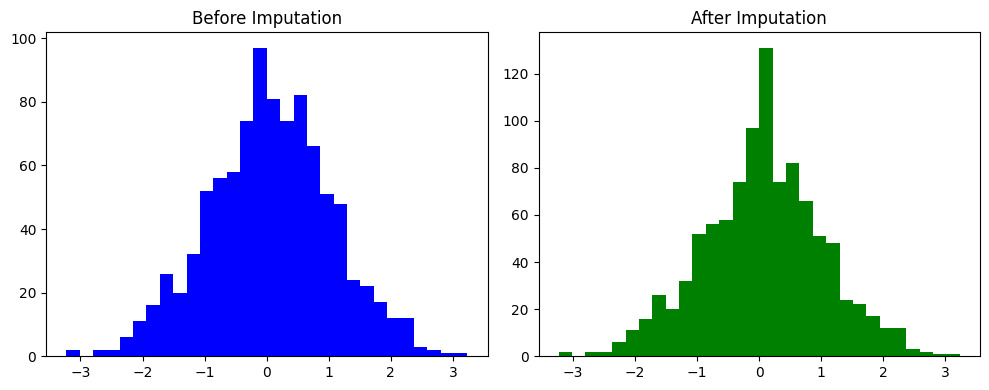

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 1000 samples from a normal distribution
data = np.random.normal(0, 1, 1000)

# Introduce 50 random missing values
data[np.random.choice(1000, 50, replace=False)] = np.nan

# Save a copy before imputation for plotting
data_before = data.copy()

# Fill missing values with the mean
mean_value = np.nanmean(data)
data[np.isnan(data)] = mean_value

# Plot histograms
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(data_before[~np.isnan(data_before)], bins=30, color='blue')
plt.title('Before Imputation')

plt.subplot(1, 2, 2)
plt.hist(data, bins=30, color='green')
plt.title('After Imputation')

plt.tight_layout()
plt.show()



### Question 9
Implement Min-Max scaling on the following list of numbers [2, 5, 10, 15, 20] using sklearn.preprocessing.MinMaxScaler. Print the scaled array.

(Include your Python code and output in the code box below.)

In [4]:

from sklearn.preprocessing import MinMaxScaler
import numpy as np

data = np.array([[2], [5], [10], [15], [20]])
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

print("Scaled array:\n", scaled)


Scaled array:
 [[0.        ]
 [0.16666667]
 [0.44444444]
 [0.72222222]
 [1.        ]]


### Question 10
You are working as a data scientist for a retail company. You receive a customer transaction dataset that contains:

● Missing ages,
● Outliers in transaction amount,
● A highly imbalanced target (fraud vs. non-fraud),
● Categorical variables like payment method.

Explain the step-by-step data preparation plan you’d follow before training a machine learning model. Include how you’d address missing data, outliers, imbalance, and encoding.

(Include your Python code and output in the code box below.)


**Answer:**  
1. **Handling Missing Ages:** Impute missing ages using median (numerical).  
2. **Handling Outliers in Transaction Amount:** Apply IQR-based removal or transformation.  
3. **Handling Imbalanced Target:** Use SMOTE (oversampling) or class weights.  
4. **Handling Categorical Variables:** Use one-hot encoding for nominal features (like payment method).  
5. **Final Step:** Scale numerical features, split into train/test, and proceed with model training.  


In [14]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Create dummy data
data = {
    'age': [22, np.nan, 45, 38, 27, np.nan, 50, 29, 31, 40],
    'transaction_amount': [100, 5000, 150, 200000, 300, 250, 10000, 400, 700, 1200],
    'payment_method': ['card', 'cash', 'card', 'transfer', 'cash', 'card', 'transfer', 'cash', 'card', 'transfer'],
    'fraud': [0, 0, 1, 0, 0, 0, 1, 0, 0, 1]
}
df = pd.DataFrame(data)

# Fill missing ages with median
imputer = SimpleImputer(strategy='median')
df['age'] = imputer.fit_transform(df[['age']])

# Cap outliers in transaction_amount at 1st and 99th percentile
lower = df['transaction_amount'].quantile(0.01)
upper = df['transaction_amount'].quantile(0.99)
df['transaction_amount'] = df['transaction_amount'].clip(lower, upper)

# One-hot encode payment_method
df = pd.get_dummies(df, columns=['payment_method'], drop_first=True)

# Split features and target
X = df.drop('fraud', axis=1)
y = df['fraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Use SMOTE with k_neighbors=1 to fix small minority class issue
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_resampled).value_counts())


Before SMOTE: fraud
0    5
1    2
Name: count, dtype: int64
After SMOTE: fraud
1    5
0    5
Name: count, dtype: int64
